This is an application of a decision tree classifier from scikit-learn to classify objects from the Sloan Sky Survey as stars, galaxies, or quasars(QSOs). In this refined version of yesterday's analysis, a decision tree classifier is used that classifies objects based on redshift. PCA is not used, as decisions are made based on the values of only one column.

In [32]:

import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
import os
pd.options.mode.chained_assignment = None

First we import all necesssary libraries.

In [33]:
os.chdir('/home/wln/Documents/python_programs/Astronomy_Datasets')

s = pd.read_csv("sloan_survey.csv")




sub = s[['class', 'u', 'g' , 'r' , 'i' ,'z','redshift']]


Then, we subset the necessary columns from the array.


<Axes: xlabel='u', ylabel='redshift'>

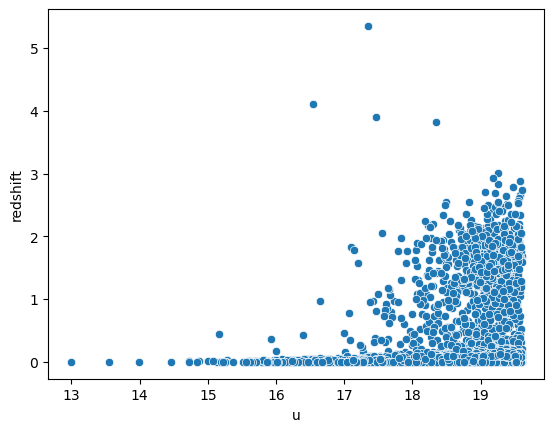

In [34]:
plt.figure()
sns.scatterplot(x='u',y='redshift',data=s)


These two graphs show a correlation between the redshift and ultraviolet peak of each image


In [35]:

X = np.array(sub['redshift'].fillna(0))
X = X[:, np.newaxis]

y = np.array(sub['class'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)



This is where the train and test sets are created. Ten percent of the dataset is set aside for testing.

In [36]:
D = DecisionTreeClassifier()

D.fit(X_train,y_train)

y_pred = D.predict(X_test)

In this section, the decision tree classifier is fitted on the training set, and used to predict y-values of the test set.


In [37]:
sub['pred_class'] = D.predict(X)



print(D.score(X, y))


print(D.score(X_test, y_test))

0.9982
0.985


This model predicts the labels of the test set at a rate of 98%, a much higher than the previous model. Redshift is by far the best classifier examined.  The following seaborn plot shows the average readshift of each object type.  It is therefore apparent that most individual stars are closer to Earth than most galaxies, and most galaxies closer than most quasars.

<Axes: xlabel='class', ylabel='redshift'>

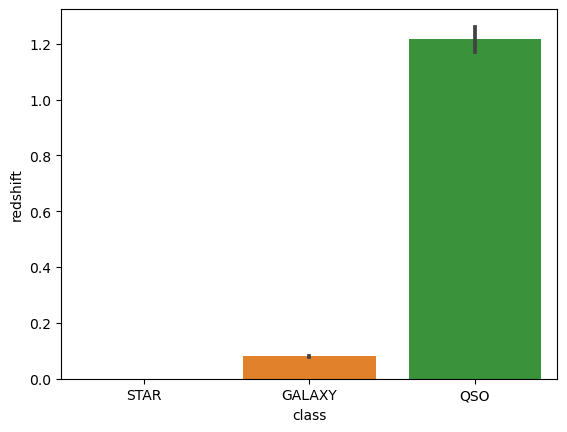

In [39]:
sns.barplot(x='class',y='redshift',data=s)